In [2]:
# Importing packages without using nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from string import digits
import nltk

In [37]:
text = """Retailers are selling end-of-season lychees at up to VND180,000 (US$7.1) per kilogram, thrice the price a year ago, due to a poor harvest.
They are not as plentifully available as in previous years in HCMC and cost VND165,000-180,000 at premium stores and VND85,000-96,000 at large retail chains like MM Mega Market and Winmart.

Some supermarkets have run out of stock while others are selling the fruit in very limited quantities at VND120,000-135,000.
Lychee output took a nosedive this year. In Bac Giang Province’s Luc Ngan District, a major producer of the fruit, lychee farmer Nguyen Thi Hien had expected her output to decrease by 30% this year, but she said it has dropped by 60%.

She sold her last half a ton at VND80,000 per kilogram, the highest price she has got in her life.

According to the Luc Ngan People’s Committee, even buyers and processing facilities in the district have been struggling to source lychees. While farmers usually have to transport the fruit to markets, traders are buying right at the farm gate this year, it said.

Similarly, in Hai Duong Province’s Thanh Ha District, another large lychee grower, farmers have reported significantly lower harvests.

One of them, Giang, said he has only managed to harvest three tons this year, down from last year’s 11. Despite the unprecedented prices he incurred losses due to the poor harvest, he said.

Hoang Anh, a lychee merchant in the northern region, said Thanh Ha District is almost out of lychees and she is only able to procure them from Luc Ngan. The fruit is in great demand this year, both domestically and internationally, she said.

Demand from China, the biggest consumer of Vietnamese lychees, has increased since that country also had poor harvests, while southern Vietnam has consumed a lot more lychees this year, she said.

She was only able to buy enough to meet 50-70% of the orders she received.

An MM Mega Market spokesperson said the falling supply has caused prices to increase towards the end of the season unlike in previous years when they would decline.

MM signed an agreement with Bac Giang farmers at the start of the season to buy 100 tons of the fruit this year, but it now seems difficult given the poor harvest, they added.

Central Retail, which operates the GO! supermarket chain, also said it might not be able to buy 300 tons of lychee as it had previously planned

According to statistics from the Bac Giang Department of Industry and Trade, farmers in the province have harvested 67,000 tons so far this year.

Around 43,000 tons have been consumed domestically, and the rest has been exported, the department said.

China bought 23,800 tons of the remaining 24,000 tons. Japan, the U.S., the EU, Australia, Dubai, and some Southeast Asian countries also imported Vietnamese lychees."""

In [38]:
# remove number, and tokenize le text

remove_digits = str.maketrans("", "", digits)
text_only = text.lower().translate(remove_digits)


nlp = spacy.load('en_core_web_sm')
stopW = nlp.Defaults.stop_words



In [39]:
# Function clean
def clean(str):
  tokens = nlp(str)
  text_clean = [w.lemma_ for w in tokens if (not w.lemma_ in stopW) and (w.lemma_.isalpha())]
  return (text_clean)

data = clean(text_only)

In [40]:

dico = nltk.FreqDist(data)

In [26]:
# Create an array from the image you want to use as a mask
## Your file path will look different

from google.colab import drive
drive.mount('/content/drive')
vn_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/NLP/vietnam.jpg"))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# A similar function, but using the mask
def wc_mapshape(dico, title, mask=None):
    cloud = WordCloud(scale=6,
                      #max_words=50,
                      max_font_size=200, min_font_size=10,
                      colormap='seismic',
                      mask=mask,
                      background_color='white',
                      collocations=True).generate_from_frequencies(dico)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

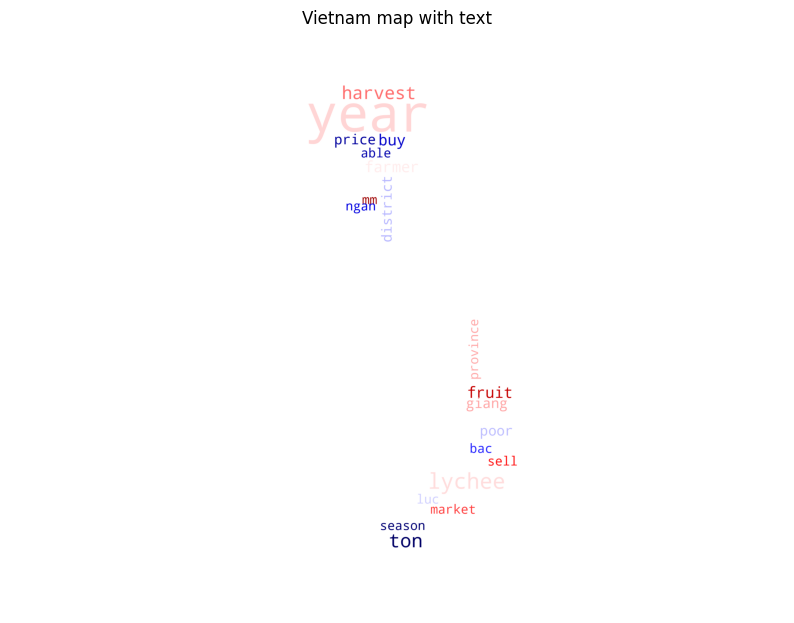

In [54]:
# Use the function with the rome_corpus and our mask to create word cloud
wc_mapshape(dico, 'Vietnam map with text' , mask=vn_mask)

In [46]:
dico

FreqDist({'year': 12, 'lychee': 11, 'ton': 8, 'harvest': 7, 'fruit': 5, 'farmer': 5, 'buy': 5, 'price': 4, 'poor': 4, 'giang': 4, ...})